# Here in this Notebook dataset we will try to check any KPIs of the customer and product successes for a company

In [ ]:
# loaded the dataset and show all columns
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# see tge type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# checking churned users

In [ ]:
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})
churn_user = df['Churn'].sum()

total_users = df.shape[0]
churn_rate = (churn_user / total_users) * 100

print(f"Number of chunr users: {churn_user}")
print(f"the churn rate: {churn_rate:.2f}%")

Number of chunr users: 1869
the churn rate: 26.54%


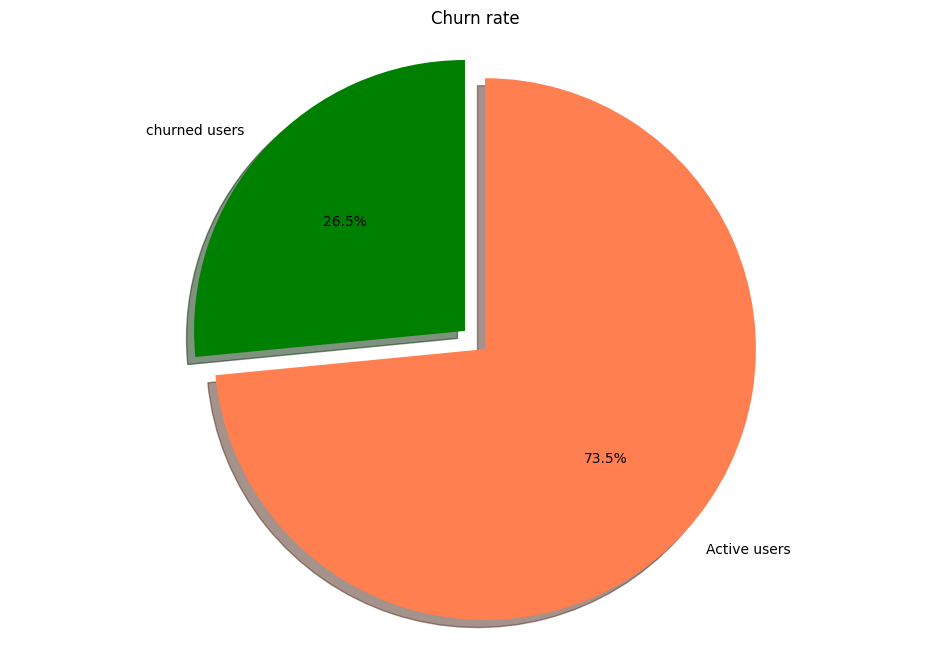

In [ ]:
import matplotlib.pyplot as plt
labels = ['churned users', 'Active users']
sizes = [churn_rate, 100 - churn_rate]
colors = ['green', 'coral']
explode = (0.1, 0)

plt.figure(figsize=(12, 8))
plt.pie(sizes, explode=explode, labels=labels, colors= colors, autopct='%1.1f%%',
        startangle=90, shadow=True)
plt.title('Churn rate')
plt.axis('equal')
plt.show()

# chekcing new and existing users

In [ ]:
activeusers = df[df['Churn'] == 0].shape[0]
activeusers2 = total_users - churn_user
retentionrate = (activeusers / total_users) * 100
print("active users total:", activeusers)
print("retention rate:", retentionrate )

active users total: 5174
retention rate: 73.4630129206304


In [ ]:
tenurethreshold = 2
newusers = df[df['tenure'] <= tenurethreshold].shape[0]
print(f"new users (tenure <= {tenurethreshold} months): {newusers}")

new users (tenure <= 2 months): 862


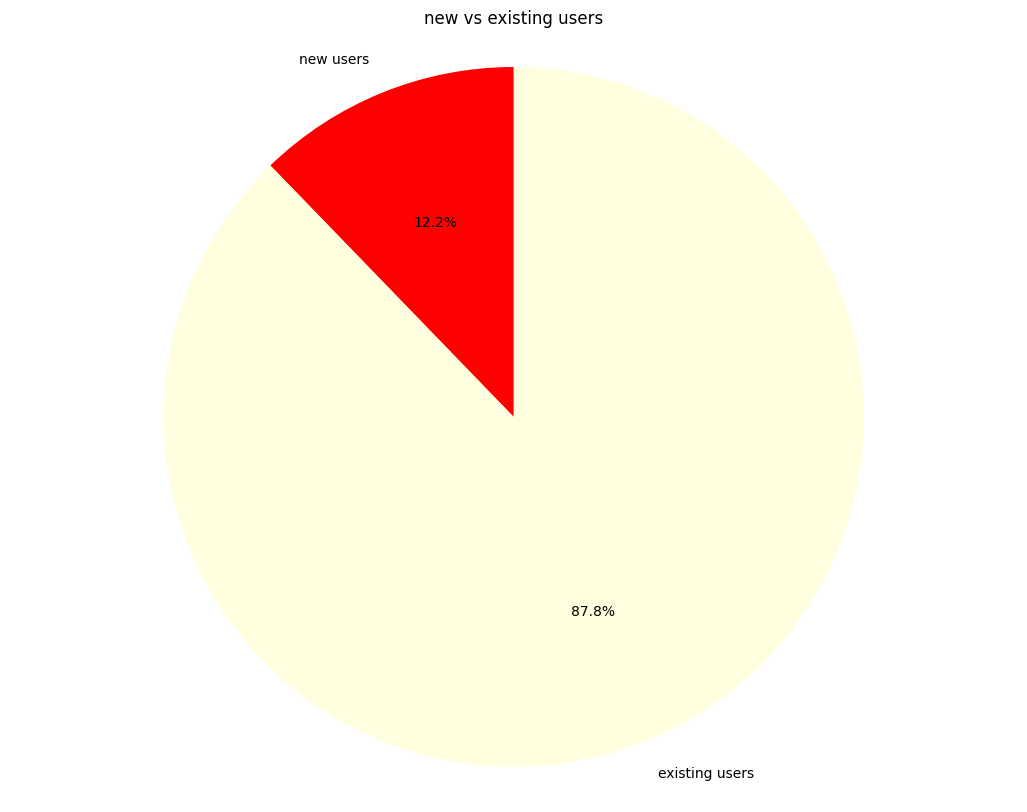

In [ ]:
existingusers = total_users - newusers
labels = ['new users', 'existing users']
sizes = [newusers, existingusers]
colors = ['red', 'LightYellow']


plt.figure(figsize=(13, 10))
plt.pie(sizes, labels=labels, colors= colors,
        autopct='%1.1f%%', startangle=90)
plt.title('new vs existing users')
plt.axis('equal')
plt.show()

# product success

In [ ]:
# check the relation between the services the churn rate
# which cna show what services/products are successful

services = ['OnlineSecurity', 'DeviceProtection', 'TechSupport', 'OnlineBackup', 'StreamingTV', 'StreamingMovies']
for service in services:
    print(f"    The Churn Analysis for {service}    ")
    print(pd.crosstab(df[service], df['Churn'], normalize='index') * 100)

    The Churn Analysis for OnlineSecurity    
Churn                        0          1
OnlineSecurity                           
No                   58.233276  41.766724
No internet service  92.595020   7.404980
Yes                  85.388806  14.611194
    The Churn Analysis for DeviceProtection    
Churn                        0          1
DeviceProtection                         
No                   60.872375  39.127625
No internet service  92.595020   7.404980
Yes                  77.497936  22.502064
    The Churn Analysis for TechSupport    
Churn                        0          1
TechSupport                              
No                   58.364526  41.635474
No internet service  92.595020   7.404980
Yes                  84.833659  15.166341
    The Churn Analysis for OnlineBackup    
Churn                        0          1
OnlineBackup                             
No                   60.071244  39.928756
No internet service  92.595020   7.404980
Yes                  

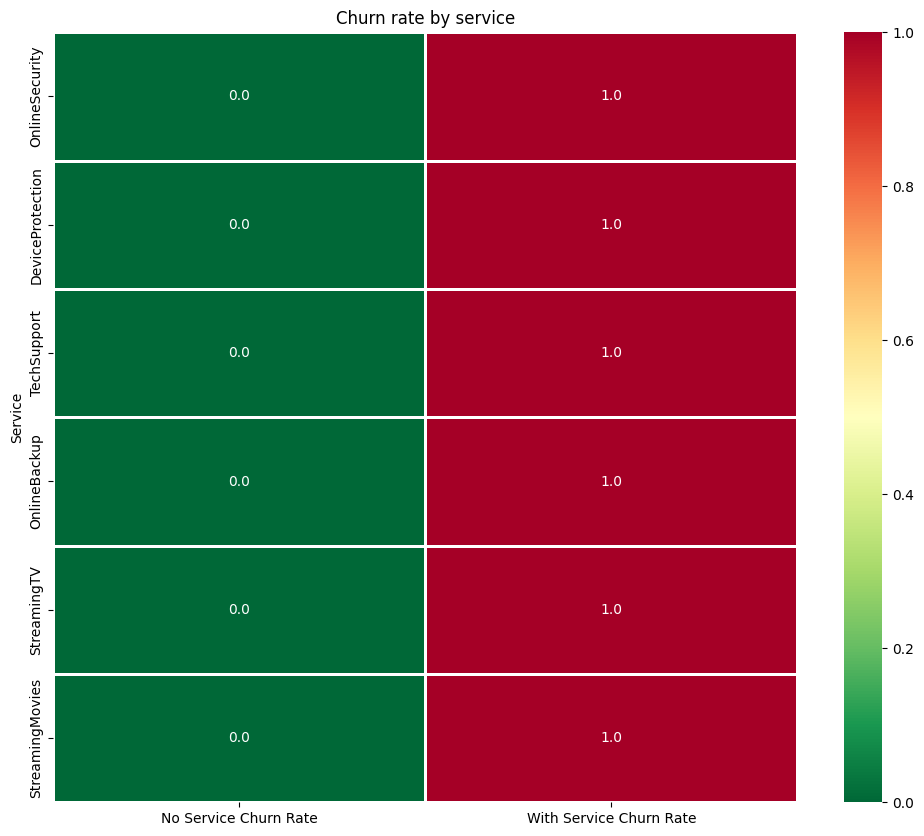

In [ ]:
import seaborn as sns

servicechurndata = []
for service in services:
    churn_table = pd.crosstab(df[service], df['Churn'], normalize='index')*100
    servicechurndata.append({ 'Service': service,
                             'No Service Churn Rate': churn_table.loc['No', 0] if 'No' in churn_table else 0,
                             'With Service Churn Rate': churn_table.loc['Yes', 1] if 'Yes' in churn_table else 1
                              })
servicedf = pd.DataFrame(servicechurndata)
servicedf.set_index('Service', inplace=True)
plt.figure(figsize=(12, 10))
sns.heatmap(servicedf, annot=True, cmap='RdYlGn_r', fmt='.1f', linewidths=1)
plt.title('Churn rate by service')
plt.show()